# Challenge: Promotions

In this challenge, you'll develop codes to parse and analyze data returned from another API on Zalando such as [Promos homme (Men's Promotions)
](https://www.zalando.fr/promo-homme/) or [Promos femme (Women's Promotions)](https://www.zalando.fr/promo-femme/). The workflow is almost the same as in the guided lesson but you'll work with different data.

## Obtaining the link

Wrote your codes in the cell below to obtain the data from the API endpoint you choose. A recap of the workflow:

1. Examine the webpages and choose one that you want to work with.

1. Use Google Chrome's DevTools to inspect the XHR network requests. Find out the API endpoint that serves data to the webpage.

1. Test the API endpoint in the browser to verify its data.

1. Change the page number offset of the API URL to test if it's working.

In [64]:
# your code here
import requests as r
import pandas as pd
import json
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set()
from scipy import stats

#symbols = ['ATVI', 'EA']
#urls = ['https://financialmodelingprep.com/api/v3/financials/income-statement/' + code for code in symbols]
#urls

#request = [r.get(url) for url in urls]
#request

#Json = [i.json() for i in request]

#dfs = [pd.DataFrame(df['financials']) for df in Json]

#dfs
#Games = pd.concat(dfs)

#Games

url = 'https://financialmodelingprep.com/api/v3/financials/income-statement/ATVI'
url2 = 'https://financialmodelingprep.com/api/v3/financials/income-statement/EA'
r.get(url)
r.get(url).content
r.get(url2).content
request = r.get(url)
request2 = r.get(url2)
Json = request.json()
Json2 = request2.json()
Json2

{'symbol': 'EA',
 'financials': [{'date': '2019-03-31',
   'Revenue': '4950000000.0',
   'Revenue Growth': '-0.0388',
   'Cost of Revenue': '1322000000.0',
   'Gross Profit': '3628000000.0',
   'R&D Expenses': '1433000000.0',
   'SG&A Expense': '1162000000.0',
   'Operating Expenses': '2632000000.0',
   'Operating Income': '996000000.0',
   'Interest Expense': '0.0',
   'Earnings before Tax': '1079000000.0',
   'Income Tax Expense': '60000000.0',
   'Net Income - Non-Controlling int': '0.0',
   'Net Income - Discontinued ops': '0.0',
   'Net Income': '1019000000.0',
   'Preferred Dividends': '0.0',
   'Net Income Com': '1019000000.0',
   'EPS': '3.36',
   'EPS Diluted': '3.33',
   'Weighted Average Shs Out': '303000000.0',
   'Weighted Average Shs Out (Dil)': '306000000.0',
   'Dividend per Share': '0.0',
   'Gross Margin': '0.7329',
   'EBITDA Margin': '0.247',
   'EBIT Margin': '0.218',
   'Profit Margin': '0.206',
   'Free Cash Flow margin': '0.2885',
   'EBITDA': '1224000000.0',
  

## Reading the data

In the next cell, use Python to obtain data from the API endpoint you chose in the previous step. Workflow:

1. Import libraries.

1. Define the initial API endpoint URL.

1. Make request to obtain data of the 1st page. Flatten the data and store it in an empty object variable.

1. Find out the total page count in the 1st page data.

1. Use a FOR loop to make requests for the additional pages from 2 to page count. Append the data of each additional page to the flatterned data object.

1. Print and review the data you obtained.

In [66]:
# your code here
Activision = pd.DataFrame(Json['financials'])
Activision

EA = pd.DataFrame(Json2['financials'])
EA

,date,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,...,Gross Margin,EBITDA Margin,EBIT Margin,Profit Margin,Free Cash Flow margin,EBITDA,EBIT,Consolidated Income,Earnings Before Tax Margin,Net Profit Margin
0,2019-03-31,4950000000.0,-0.0388,1322000000.0,3628000000.0,1433000000.0,1162000000.0,2632000000.0,996000000.0,0.0,...,0.7329,0.247,0.218,0.206,0.2885,1224000000.0,1079000000.0,1019000000.0,0.218,0.2059
1,2018-03-31,5150000000.0,0.063,1277000000.0,3873000000.0,1320000000.0,1110000000.0,2439000000.0,1434000000.0,0.0,...,0.752,0.308,0.2814,0.203,0.3078,1585000000.0,1449000000.0,1043000000.0,0.2814,0.2025
2,2017-03-31,4845000000.0,0.1021,1298000000.0,3547000000.0,1205000000.0,1112000000.0,2323000000.0,1224000000.0,0.0,...,0.7321,0.285,0.2497,0.2,0.3003,1382000000.0,1210000000.0,967000000.0,0.2497,0.1996
3,2016-03-31,4396000000.0,-0.0264,1354000000.0,3042000000.0,1109000000.0,1028000000.0,2144000000.0,898000000.0,0.0,...,0.692,0.244,0.1995,0.263,0.3121,1074000000.0,877000000.0,1156000000.0,0.1995,0.263
4,2015-03-31,4515000000.0,0.2629,1429000000.0,3086000000.0,1094000000.0,1033000000.0,2138000000.0,948000000.0,0.0,...,0.6835,0.254,0.2049,0.194,0.2153,1145000000.0,925000000.0,875000000.0,0.2049,0.1938
5,2014-03-31,3575000000.0,-0.0585,1347000000.0,2228000000.0,1125000000.0,1090000000.0,2195000000.0,33000000.0,0.0,...,0.6232,0.065,0.002,0.002,0.172,234000000.0,7000000.0,8000000.0,0.002,0.0022
6,2013-03-31,3797000000.0,-0.0835,1388000000.0,2409000000.0,1153000000.0,1142000000.0,2288000000.0,121000000.0,0.0,...,0.6344,0.106,0.0366,0.026,0.0574,403000000.0,139000000.0,98000000.0,0.0366,0.0258
7,2012-03-31,4143000000.0,0.1544,1598000000.0,2545000000.0,1180000000.0,1260000000.0,2510000000.0,35000000.0,0.0,...,0.6143,0.056,0.0043,0.018,0.0316,234000000.0,18000000.0,76000000.0,0.0043,0.0183
8,2011-03-31,3589000000.0,-0.0178,1499000000.0,2090000000.0,1124000000.0,1077000000.0,2402000000.0,-312000000.0,0.0,...,0.5823,-0.028,-0.0777,-0.077,0.0727,-99000000.0,-279000000.0,-276000000.0,-0.0777,-0.0769
9,2010-03-31,3654000000.0,-0.1325,1866000000.0,1788000000.0,1229000000.0,1050000000.0,2474000000.0,-686000000.0,0.0,...,0.4893,-0.141,-0.1932,-0.185,-0.0419,-514000000.0,-706000000.0,-677000000.0,-0.1932,-0.1853


In [67]:
Activision['date'].equals(EA['date'])
Activision.dtypes

date                                object
Revenue                             object
Revenue Growth                      object
Cost of Revenue                     object
Gross Profit                        object
R&D Expenses                        object
SG&A Expense                        object
Operating Expenses                  object
Operating Income                    object
Interest Expense                    object
Earnings before Tax                 object
Income Tax Expense                  object
Net Income - Non-Controlling int    object
Net Income - Discontinued ops       object
Net Income                          object
Preferred Dividends                 object
Net Income Com                      object
EPS                                 object
EPS Diluted                         object
Weighted Average Shs Out            object
Weighted Average Shs Out (Dil)      object
Dividend per Share                  object
Gross Margin                        object
EBITDA Marg

In [95]:
Games = pd.concat([Activision, EA], axis=1)
Games

,date,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,...,Gross Margin,EBITDA Margin,EBIT Margin,Profit Margin,Free Cash Flow margin,EBITDA,EBIT,Consolidated Income,Earnings Before Tax Margin,Net Profit Margin
0,2018-12-31,7500000000.0,0.0688,2517000000.0,4.983000e+09,1101000000.0,1894000000.0,2995000000.0,1988000000.0,71000000.0,...,0.7329,0.247,0.218,0.206,0.2885,1224000000.0,1079000000.0,1019000000.0,0.218,0.2059
1,2017-12-31,7017000000.0,0.0619,2501000000.0,4.516000e+09,1069000000.0,2138000000.0,3207000000.0,1309000000.0,146000000.0,...,0.752,0.308,0.2814,0.203,0.3078,1585000000.0,1449000000.0,1043000000.0,0.2814,0.2025
2,2016-12-31,6608000000.0,0.4168,2394000000.0,4.214000e+09,958000000.0,1844000000.0,2802000000.0,1412000000.0,214000000.0,...,0.7321,0.285,0.2497,0.2,0.3003,1382000000.0,1210000000.0,967000000.0,0.2497,0.1996
3,2015-12-31,4664000000.0,0.0581,1585000000.0,3.079000e+09,646000000.0,1114000000.0,1760000000.0,1319000000.0,198000000.0,...,0.692,0.244,0.1995,0.263,0.3121,1074000000.0,877000000.0,1156000000.0,0.1995,0.263
4,2014-12-31,4408000000.0,-0.0382,1525000000.0,2.883000e+09,571000000.0,1129000000.0,1700000000.0,1183000000.0,202000000.0,...,0.6835,0.254,0.2049,0.194,0.2153,1145000000.0,925000000.0,875000000.0,0.2049,0.1938
5,2013-12-31,4583000000.0,-0.0562,1531000000.0,3.052000e+09,584000000.0,1096000000.0,1680000000.0,1372000000.0,53000000.0,...,0.6232,0.065,0.002,0.002,0.172,234000000.0,7000000.0,8000000.0,0.002,0.0022
6,2012-12-31,4856000000.0,0.0212,1662000000.0,3.194000e+09,604000000.0,1139000000.0,1743000000.0,1451000000.0,-7000000.0,...,0.6344,0.106,0.0366,0.026,0.0574,403000000.0,139000000.0,98000000.0,0.0366,0.0258
7,2011-12-31,4755000000.0,0.0693,1772000000.0,2.983000e+09,629000000.0,1001000000.0,1655000000.0,1328000000.0,-3000000.0,...,0.6143,0.056,0.0043,0.018,0.0316,234000000.0,18000000.0,76000000.0,0.0043,0.0183
8,2010-12-31,4447000000.0,0.0393,2135000000.0,2.312000e+09,626000000.0,891000000.0,1843000000.0,469000000.0,0.0,...,0.5823,-0.028,-0.0777,-0.077,0.0727,-99000000.0,-279000000.0,-276000000.0,-0.0777,-0.0769
9,2009-12-31,4279000000.0,0.4765,2307000000.0,1.972000e+09,627000000.0,939000000.0,1998000000.0,-26000000.0,0.0,...,0.4893,-0.141,-0.1932,-0.185,-0.0419,-514000000.0,-706000000.0,-677000000.0,-0.1932,-0.1853


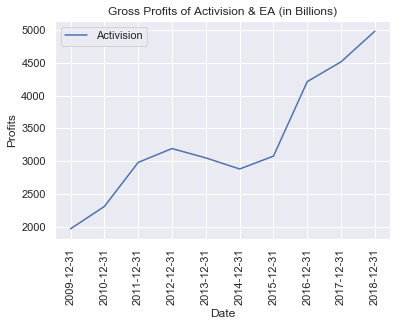

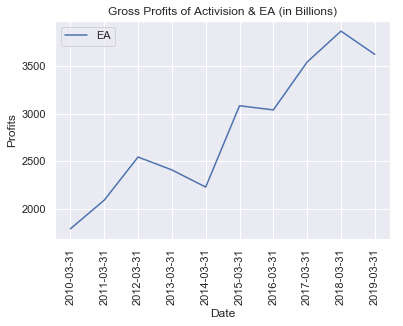

In [116]:
Activision.sort_values('date', ascending = False)
EA.sort_values('date', ascending = False)

ATVIProfit = Activision['Gross Profit'].astype(float)
EAProfit = EA['Gross Profit'].astype(float)

ATVIConvert = ATVIProfit.div(1000000).round(2)
EAConvert = EAProfit.div(1000000).round(2)

x1 = Activision['date']
y1 = ATVIConvert
x2 = EA['date']
y2 = EAConvert

plt.plot(x1, y1, label='Activision')
plt.xlabel('Date')
plt.ylabel('Profits')
plt.xticks(rotation=90)

plt.title("Gross Profits of Activision & EA (in Billions)")
plt.legend()
ax = plt.gca()
ax.invert_xaxis()
plt.show()


plt.plot(x2, y2, label='EA')
plt.xlabel('Date')
plt.ylabel('Profits')
plt.xticks(rotation=90)

plt.title("Gross Profits of Activision & EA (in Billions)")
plt.legend()
ax = plt.gca()
ax.invert_xaxis()
plt.show()

## Bonus

Extract the following information from the data:

* The trending brand.

* The product(s) with the highest discount.

* The sum of discounts of all goods (sum_discounted_prices divided by sum_original_prices).

In [ ]:
# your code here